## Ch 2 - Mathematical Building Blocks of Neural Networks

From https://github.com/fchollet/deep-learning-with-python-notebooks,
combined with my own notes from the book.

### 2.1 First example of a neural network

The problem we’re trying to solve here is to classify grayscale images of handwritten digits (28 × 28 pixels) into their 10 categories (0 through 9). We’ll use the MNIST dataset, a classic in the machine-learning community, which has been around almost as long as the field itself and has been intensively studied. It’s a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s.

In [1]:
import keras
keras.__version__

/Users/melaniekwon/Dropbox/School/THESIS/tensorflowPractice/venv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/melaniekwon/Dropbox/School/THESIS/tensorflowPractice/venv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


'2.1.3'

In [2]:
# MNIST dataset comes preloaded in Keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Look at the training data:

In [3]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Look at the test data:

In [7]:
len(test_labels)

10000

In [6]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Build the network

1. Present our neural network with the training data, train_images and train_labels. 
2. The network will then learn to associate images and labels.
3. Ask the network to produce predictions for test_images, and we will verify if these predictions match the labels from test_labels.

In [9]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

'''
network consists of a chain of two Dense layers, that each layer applies a few simple tensor 
operations to the input data, and that these operations involve weight tensors. 
Weight tensors, which are attributes of the layers, are where the knowledge of the network persists.
'''

Sequence of two Dense layers, which are densely-connected (also called "fully-connected") neural layers.

The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1).

Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

---

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

- **A loss function:** the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be able to steer itself in the right direction.
- **An optimizer:** this is the mechanism through which the network will update itself based on the data it sees and its loss function.
- **Metrics to monitor during training and testing:** Here we will only care about accuracy (the fraction of the images that were correctly classified).

In [10]:
'''
Categorical_crossentropy is the loss function that’s used as a feedback signal for learning 
the weight tensors, and which the training phase will attempt to minimize.
this reduction of the loss happens via mini-batch stochastic gradient descent. 

The exact rules governing a specific use of gradient descent are defined by the rmsprop 
optimizer passed as the first argument
'''

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Preprocess Data

Preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in the [0, 1] interval.

**Training image**

Before: array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval

After: float32 array of shape (60000, 28 * 28) with values between 0 and 1

In [11]:
'''
input images are stored in Numpy tensors, which are here formatted as float32 tensors of shape 
(60000, 784) (training data) and (10000, 784) (test data)
'''
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [12]:
print(train_images.shape)

(60000, 784)


In [13]:
print(test_images.shape)

(10000, 784)


### Categorically encode the labels

In [14]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Train the network

We are now ready to train our network, which in Keras is done via a call to the fit method of the network: we "fit" the model to its training data.

The network will start to iterate on the training data in mini-batches of 128 samples, 5 times over (each iteration over all the training data is called an epoch). At each iteration, the network will compute the gradients of the weights with regard to the loss on the batch, and update the weights accordingly. After these 5 epochs, the network will have performed 2,345 gradient updates (469 per epoch), and the loss of the network will be sufficiently low that the network will be capable of classifying handwritten digits with high accuracy.

In [15]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.2597 - acc: 0.9253
Epoch 2/5
60000/60000 [==============================] - 6s 93us/step - loss: 0.1031 - acc: 0.9696
Epoch 3/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.0689 - acc: 0.9792
Epoch 4/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.0498 - acc: 0.9847
Epoch 5/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.0380 - acc: 0.9885


Two quantities are being displayed during training: 
- the "loss" of the network over the training data, and 
- the accuracy of the network over the training data.

In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 91us/step


In [17]:
print('test_acc:', test_acc)

test_acc: 0.9795


## 2.2 Data Representations for Neural Networks

In the previous example, we started from data stored in multidimensional Numpy arrays, also called tensors. In general, all current machine-learning systems use tensors as their basic data structure. Tensors are fundamental to the field—so fundamental that Google’s TensorFlow was named after them. So what’s a tensor?

At its core, a tensor is a container for data—almost always numerical data. So, it’s a container for numbers. You may be already familiar with matrices, which are 2D tensors: tensors are a generalization of matrices to an arbitrary number of dimensions (note that in the context of tensors, a *dimension* is often called an *axis*).


#### Scalars (0D tensors)

A tensor that contains only one number is called a **scalar** (or scalar tensor, or 0-dimensional tensor, or 0D tensor). 

In Numpy, a float32 or float64 number is a scalar tensor (or scalar array). 

Display the number of axes of a Numpy tensor via the `ndim` attribute; a scalar tensor has 0 axes (ndim == 0).  

The number of axes of a tensor is also called its *rank*.

In [21]:
import numpy as np

x = np.array(12)
x

array(12)

In [22]:
x.ndim

0

#### Vectors (1D tensors)

An array of numbers is called a vector, or 1D tensor. A 1D tensor is said to have exactly one axis.

In [23]:
x = np.array([12, 3, 6, 14])
x

array([12,  3,  6, 14])

In [24]:
x.ndim

1

#### Matrices (2D tensors)

An array of vectors is a matrix, or 2D tensor. A matrix has two axes (often referred to rows and columns).

In [25]:
x = np.array([[5, 78, 2, 34, 0],
                  [6, 79, 3, 35, 1],
                  [7, 80, 4, 36, 2]])

In [26]:
x.ndim

2

#### 3D tensors and higher-dimensional tensors

If you pack such matrices in a new array, you obtain a 3D tensor, which you can visually interpret as a cube of numbers.

In [27]:
x = np.array([[[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]]])

In [28]:
x.ndim

3

### Key attributes

A tensor is defined by three key attributes:
1. **Number of axes (rank)**
2. **Shape** - tuple of integers that describes how many dimensions the tensor has along each axis
3. **Data type** - the type of the data contained in the tensor; for instance, a tensor’s type could be float32, uint8, float64

In [30]:
'''Going back to MNIST'''
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.ndim)   # number of axes/rank
print(train_images.shape)  # its shape
print(train_images.dtype)  # data type

3
(60000, 28, 28)
uint8


3D tensor of 8-bit integers

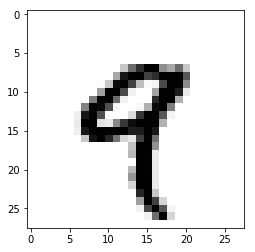

In [31]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Manipulating tensors in Numpy

Selecting specific elements in a tensor is called *tensor slicing*.

In [34]:
'''
selects digits #10 to #100 (#100 isn’t included) and 
puts them in an array of shape (90, 28, 28)
'''

my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [35]:
# equivalent to above
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [36]:
# also equivalent
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In general, you may *select between any two indices along each tensor axis*. 

For instance, in order to select 14 × 14 pixels in the bottom-right corner of all images.

In [37]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

### The notion of data batches

the first axis (axis 0, because indexing starts at 0) in all data tensors you’ll come across in deep learning will be the *samples axis* (samples dimension).

Deep-learning models don’t process an entire dataset at once; rather, they break the data into small batches. Concretely, here’s one batch of our MNIST digits, with batch size of 128:

`batch = train_images[:128]`

`batch = train_images[128:256]`

`batch = train_images[128 * n:128 * (n + 1)]`

When considering such a batch tensor, the first axis (axis 0) is called the batch axisor batch dimension.

### Real-world examples of data tensors

The data you’ll manipulate will almost always fall into one of the following categories:

- **Vector data**— 2D tensors of shape (samples, features)
- **Timeseries data or sequence data**— 3D tensors of shape (samples, timesteps, features)
- **Images**— 4D tensors of shape (samples, height, width, channels) or (samples, channels, height, width)
- **Video**— 5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

### Vector data

This is the most common case. In such a dataset, each single data point can be encoded as a vector, and thus a batch of data will be encoded as a 2D tensor (that is, an array of vectors), where the first axis is the *samples axis* and the second axis is the *features axis*.

Examples:

- An actuarial dataset of people, where we consider each person’s age, ZIP code, and income. Each person can be characterized as a vector of 3 values. So the entire dataset of 100,000 people can be stored in a 2D tensor of shape (100000, 3).
- A dataset of text documents, where we represent each document by the counts of how many times each word appears in it (out of a dictionary of 20,000 common words). Each document can be encoded as a vector of 20,000 values (one count per word in the dictionary), and thus an entire dataset of 500 documents can be stored in a tensor of shape (500, 20000).

### Timeseries data or sequence data

Whenever time matters in your data (or the notion of sequence order), it makes sense to store it in a 3D tensor with an explicit time axis. Each sample can be encoded as a sequence of vectors (a 2D tensor), and thus a batch of data will be encoded as a 3D tensor.

<h4 align="center">A 3D timeseries data tensor</h4> 
![time series tensor](img/3D_timeseries_tensor.jpeg)

The time axis is always the second axis (axis of index 1), by convention. 

Examples:
- **A dataset of stock prices.** Every minute, we store the current price of the stock, the highest price in the past minute, and the lowest price in the past minute. Thus every minute is encoded as a 3D vector, an entire day of trading is encoded as a 2D tensor of shape (390, 3) (there are 390 minutes in a trading day), and 250 days’ worth of data can be stored in a 3D tensor of shape (250, 390, 3). Here, each sample would be one day’s worth of data.

- **A dataset of tweets**, where we encode each tweet as a sequence of 280 characters out of an alphabet of 128 unique characters. In this setting, each character can be encoded as a binary vector of size 128 (an all-zeros vector except for a 1 entry at the index corresponding to the character). Then each tweet can be encoded as a 2D tensor of shape (280, 128), and a dataset of 1 million tweets can be stored in a tensor of shape (1000000, 280, 128).

###  Image data

Images typically have three dimensions: height, width, and color depth. Although grayscale images (like our MNIST digits) have only a single color channel and could thus be stored in 2D tensors, by convention image tensors are always 3D, with a one-dimensional color channel for grayscale images.

A batch of 128 grayscale images of size 256 × 256 could thus be stored in a tensor of shape (128, 256, 256, 1), and a batch of 128 color images could be stored in a tensor of shape (128, 256, 256, 3).

<h4 align="center">A 4D image data tensor</h4> 
![time series tensor](img/4D_image_tensor.jpeg)

There are two conventions for shapes of images tensors:
1. channels-last convention (used by TensorFlow) (samples, height, width, **color_depth**)
2. channels-first convention (used by Theano) (samples, **color_depth**, height, width)

Keras framework provides support for both formats.

### Video data

Video data is one of the few types of real-world data for which you’ll need 5D tensors. A video can be understood as a sequence of frames, each frame being a color image. Because each frame can be stored in a 3D tensor (height, width, color_depth), a sequence of frames can be stored in a 4D tensor (frames, height, width, color_depth), and thus a batch of different videos can be stored in a 5D tensor of shape (-samples, frames, height, width, color_depth).

For instance, a 60-second, 144 × 256 YouTube video clip sampled at 4 frames per second would have 240 frames. A batch of four such video clips would be stored in a tensor of shape (4, 240, 144, 256, 3). That’s a total of 106,168,320 values! If the dtype of the tensor was float32, then each value would be stored in 32 bits, so the tensor would represent 405 MB. Heavy! Videos you encounter in real life are much lighter, because they aren’t stored in float32, and they’re typically compressed by a large factor (such as in the MPEG format).


## 2.3 The gears of neural networks: tensor operations

In our initial example, we were building our network by stacking Dense layers on top of each other. This layer can be interpreted as a function, which takes as input a 2D tensor and returns another 2D tensor—a new representation for the input tensor.

`keras.layers.Dense(512, activation='relu')`

as 

output = relu(dot(W, input) + b)

### Element-wise operations

The relu operation and addition are element-wise operations: operations that are applied independently to each entry in the tensors being considered. This means these operations are highly amenable to massively parallel implementations.

In practice, when dealing with Numpy arrays, these operations are available as well-optimized built-in Numpy functions, which themselves delegate the heavy lifting to a Basic Linear Algebra Subprograms (BLAS) implementation.

So, in Numpy, you can do the following element-wise operation, and it will be blazing fast:

`z = x + y                   
z = np.maximum(z, 0.)  `

### Broadcasting

What happens with addition when the shapes of the two tensors being added differ?

When possible, and if there’s no ambiguity, the smaller tensor will be *broadcasted* to match the shape of the larger tensor. Broadcasting consists of two steps:

1. Axes (called broadcast axes) are added to the smaller tensor to match the ndim of the larger tensor.
2. The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

With broadcasting, you can generally apply two-tensor element-wise operations if one tensor has 

shape (a, b, ... n, n + 1, ... m) and the other has 

shape (n, n + 1, ... m).

The broadcasting will then automatically happen for axes athrough n - 1.

In [41]:
'''
element-wise maximum operation to two tensors of different shapes via broadcasting
'''
x = np.random.random((64, 3, 32, 10))        
y = np.random.random((32, 10))               
z = np.maximum(x, y)         

### Tensor dot

The dot operation, also called a tensor product is the most common, most useful tensor operation. Contrary to element-wise operations, it combines entries in the input tensors.

in Numpy, Keras, Theano, and TensorFlow,

An element-wise product is done with the \* operator 

`dot` uses a different syntax in TensorFlow, but in both Numpy and Keras it’s done using the standard dot operator

`z = np.dot(x, y)`

in math notation,
z = x . y


### Tensor reshaping

we used it when we preprocessed the digits data before feeding it into our network:
`train_images = train_images.reshape((60000, 28 * 28))`

Reshaping a tensor means rearranging its rows and columns to match a target shape. 

In [42]:
x = np.array([[0., 1.],
                 [2., 3.],
                 [4., 5.]])
print(x.shape)

(3, 2)


In [43]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [44]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

A special case of reshaping that’s commonly encountered is transposition. **Transposing** a matrix means exchanging its rows and its columns, so that x[i, :]becomes x[:, i]:

In [45]:
x = np.zeros((300, 20))  
x = np.transpose(x)
print(x.shape)

(20, 300)


### Geometric interpretation of tensor operations

Because the contents of the tensors manipulated by tensor operations can be interpreted as coordinates of points in some geometric space, all tensor operations have a geometric interpretation.

<h4 align="center">A point in a 2D space</h4> 
![time series tensor](img/geo1.jpeg)

<h4 align="center">A point in a 2D space pictured as an arrow</h4> 
![time series tensor](img/geo2.jpeg)

<h4 align="center">Geometric interpretation of the sum of two vectors</h4> 
![time series tensor](img/geo3.jpeg)


In general, elementary geometric operations such as affine transformations, rotations, scaling, and so on can be expressed as tensor operations.

### A geometric interpretation of deep learning

Neural networks consist entirely of chains of tensor operations and that all of these tensor operations are just geometric transformations of the input data. It follows that you can interpret a neural network as a very complex geometric transformation in a high-dimensional space, implemented via a long series of simple steps.

## The engine of neural networks: gradient-based optimization

output = relu(dot(W, input) + b)

W and b are tensors that are attributes of the layer. They’re called the weights or trainable parameters of the layer. Initially, these weight matrices are filled with small random values What comes next is to gradually adjust these weights, based on a feedback signal. This gradual adjustment, also called training, is basically the learning that machine learning is all about.

**training loop**
1. Draw a batch of training samples x and corresponding targets y.
2. Run the network on x (a step called the forward pass) to obtain predictions y_pred.
3. Compute the loss of the network on the batch, a measure of the mismatch between y_pred and y.
4. Update all weights of the network in a way that slightly reduces the loss on this batch.


You’ll eventually end up with a network that has a very low loss on its training data: a low mismatch between predictions y_pred and expected targets y.

The difficult part is step 4: updating the network’s weights. Given an individual weight coefficient in the network, how can you compute whether the coefficient should be increased or decreased, and by how much?

We can take advantage of the fact that all operations used in the network are differentiable, and compute the gradient of the loss with regard to the network’s coefficients. You can then move the coefficients in the opposite direction from the gradient, thus decreasing the loss.

### What’s a derivative?

Consider a continuous, smooth function `f(x) = y`, mapping a real number `x` to a new real number `y`. Because the function is continuous, a small change in x can only result in a small change in y.

`f(x + epsilon_x) = y + epsilon_y`

In addition, because the function is smooth, when `epsilon_x` is small enough, around a certain point `p`, it’s possible to approximate `f` as a linear function of slope `a`, so that `epsilon_y` becomes `a * epsilon_x`.

`f(x + epsilon_x) = y + a * epsilon_x`

The slope a is called the derivative of f in p.

<h4 align="center">Derivative of f in p</h4> 
![time series tensor](img/derivative.jpeg)

For every differentiable function `f(x)`, there exists a derivative function `f'(x)` that maps values of `x` to the slope of the local linear approximation of `f` in those points.

If you’re trying to update x by a factor epsilon_x in order to minimize f(x), and you know the derivative of f, then your job is done: the derivative completely describes how f(x) evolves as you change x. If you want to reduce the value of f(x), you just need to move x a little in the opposite direction from the derivative.

### Derivative of tensor operation: the gradient

A **gradient** is the derivative of a tensor operation. It’s the generalization of the concept of derivatives to functions of multidimensional inputs: that is, to functions that take tensors as inputs.

Consider input vector x, a matrix W, a target y, and a loss function.
Use W to compute a target candidate y_pred, and compute the loss between the target candidate y_pred and the target y.

`y_pred = dot(W, x)
loss_value = loss(y_pred, y)
`

If the data inputs x and y are frozen, then this can be interpreted as a function mapping values of W to loss values:

`loss_value = f(W)`

Let’s say the current value of W is W0.

Derivative of f in the point W0 is a tensor gradient(f)(W0).

Gradient(f)(W0) can be interpreted as the tensor describing the *curvature* of f(W) around W0.

For this reason, in much the same way that, for a function f(x), you can reduce the value of f(x) by moving x a little in the opposite direction from the derivative, with a function f(W) of a tensor, you can reduce f(W) by moving W in the opposite direction from the gradient. Going against the curvature should put you lower on the curve.

### Stochastic gradient descent

Given a differentiable function, it’s theoretically possible to find its minimum analytically: it’s known that a function’s minimum is a point where the derivative is 0.

Applied to a neural network, that means finding analytically the combination of weight values that yields the smallest possible loss function. This can be done by solving the equation gradient(f)(W) = 0 for W. 

We use the four-step algorithm. We modify the parameters little by little based on the current loss value on a random batch of data. Because we're dealing with a differentiable function, we can compute its gradient to efficiently do part 4.

#### mini-batch stochastic gradient descent (mini-batch SGD)

1. Draw a batch of training samples x and corresponding targets y.
2. Run the network on x to obtain predictions y_pred.
3. Compute the loss of the network on the batch, a measure of the mismatch between y_pred and y.
4. Compute the gradient of the loss with regard to the network’s parameters (a backward pass).
5. Move the parameters a little in the opposite direction from the gradient—for example W = step * gradient—thus reducing the loss on the batch a bit.

<h4 align="center">SGD down a 1D loss curve (one learnable parameter)</h4> 
![time series tensor](img/sgd.jpeg)

We can see that it’s important to pick a reasonable value for the stepfactor.

single sample - true SGD
run every step on all data available - batch SGD
compromise between these two - mini-batch

In practice you’ll use gradient descent in highly dimensional spaces: every weight coefficient in a neural network is a free dimension in the space, and there may be tens of thousands or even millions of them.

<h4 align="center">Gradient descent down a 2D loss surface (two learnable parameters)</h4> 
![time series tensor](img/sgd2d.jpeg)

There exist multiple variants of SGD that differ by taking into account previous weight updates when computing the next weight update, rather than just looking at the current value of the gradients. SGD with momentum, as well as Adagrad, RMSProp, and several others. Such variants are known as *optimization methods or optimizers*.

The concept of **momentum**, which is used in many of these variants, deserves your attention. Momentum addresses two issues with SGD: 
1. Convergence speed
2. Local minima

<h4 align="center">A local minimum and a global minimum</h4> 
![time series tensor](img/momentum.jpeg)

If the parameter under consideration were being optimized via SGD with a small learning rate, then the optimization process would get stuck at the local minimum instead of making its way to the global minimum.

You can avoid such issues by using **momentum**.
Think of the optimization process as a small ball rolling down the loss curve. If it has enough momentum, the ball won’t get stuck in a ravine and will end up at the global minimum. Momentum is implemented by moving the ball at each step based not only on the current slope value (current acceleration) but also on the current velocity (resulting from past acceleration). In practice, this means updating the parameter w based not only on the current gradient value but also on the previous parameter update

## Chaining derivatives: the Backpropagation algorithm

Calculus chain rule: `f(g(x)) = f'(g(x)) * g'(x)`

Applying the chain rule to the computation of the gradient values of a neural network gives rise to an algorithm called **Backpropagation**.

Now, frameworks are capable of symoblic differentiation (TensorFlow), meaning that given a chain of operations with a known derivative, they can compute a gradient function for the chain (by applying the chain rule) that maps network parameter values to gradient values. We don't have to implement backprop by hand. 

# Key Takeaways

- **Learning** means finding a combination of model parameters that minimizes a *loss function* for a given set of training data samples and their corresponding targets.
- Learning happens by drawing random batches of data samples and their targets, and computing the gradient of the network parameters with respect to the loss on the batch. The network parameters are then moved a bit (magnitude defined by learning rate) in the opposite direction from the gradient.
- Entire learning process of is possible b/c neural nets are chains of differentiable tensor operations and so we can apply *chain rule* of derivation to find the gradient function mapping the current parameters and current batch of data to a gradient value.
- 2 key concepts: **loss** and **optimizers**. These need to be defined before feeding data into network.
- **optimizer** specifies the exact way in which gradient of the loss will be used to update parameters. (ie RMSProp, SGD with momentum, etc)